# RDKit Usage Instances

## Conformations of Cyclohexane

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

RDKit WARNING: [14:26:07] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
m = Chem.MolFromSmiles('C1CCCCC1')
m.SetProp("_Name","cyclohexane")

m = Chem.AddHs(m)
cids = AllChem.EmbedMultipleConfs(m, numConfs=10)
res = AllChem.MMFFOptimizeMoleculeConfs(m) 
print("optimization results:\n", res)

w = Chem.SDWriter('chx_cfs.sdf')
for cid in cids: w.write(m, confId=cid)
w.close()

optimization results:
 [(0, 2.368812250031951), (0, -3.5609335464164986), (0, -3.5609335469816084), (0, 2.3688122495973722), (0, -3.5609335428100186), (0, -3.560933551197448), (0, 2.368812250871666), (0, -3.560933544925278), (0, -3.5609335512000726), (0, 2.3688122506104126)]


## Fingerprinting and Molecular Similarity

In [3]:
import numpy as np
import pandas as pd

from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit import DataStructs

In [4]:
ms = [Chem.MolFromSmiles(m) for m in pd.read_csv("data/mols.csv")["SMILES"]]

fps = {}        
fps['topol'] = [Chem.RDKFingerprint(m) for m in ms]
fps['maccs'] = [MACCSkeys.GenMACCSKeys(m) for m in ms]
fps['apair'] = [Pairs.GetAtomPairFingerprint(m) for m in ms]
fps['torsi'] = [Torsions.GetTopologicalTorsionFingerprintAsIntVect(m) for m in ms]
fps['morga'] = [AllChem.GetMorganFingerprint(m, 2) for m in ms]

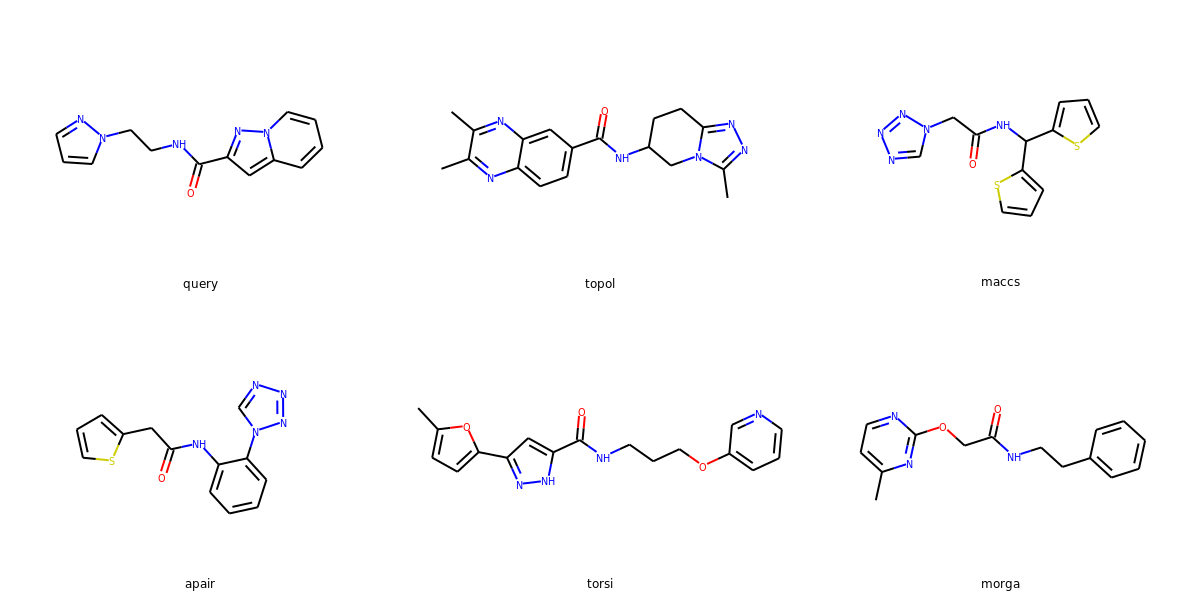

In [5]:
# find the most similar mol to the 1st mol from the rest 99 mols
sim, mol = {}, {}
for key, value in fps.items():
    sim[key] = DataStructs.BulkTanimotoSimilarity(value[0], value[1:])
    mol[key] = ms[np.argmax(sim[key]) + 1]

img = Chem.Draw.MolsToGridImage([ms[0]] + list(mol.values()), molsPerRow=3, subImgSize=(400, 300), legends=['query'] + list(mol.keys()))
img.save('images/sim_mol.png')

from IPython.display import Image
Image(filename='images/sim_mol.png')

In [6]:
pd.DataFrame(sim).corr()

,topol,maccs,apair,torsi,morga
topol,1.000000,0.443202,0.292626,0.425684,0.172240
maccs,0.443202,1.000000,0.430594,0.185562,0.347820
apair,0.292626,0.430594,1.000000,0.512514,0.834419
torsi,0.425684,0.185562,0.512514,1.000000,0.611803
morga,0.172240,0.347820,0.834419,0.611803,1.000000
